<a href="https://colab.research.google.com/github/huihuiwuwu/Github-Colab/blob/main/%ED%86%A0%ED%94%BD_%EB%B6%84%EC%84%9D_AI_Media_0801_Ver3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 토큰화된 데이터 = "tokenize(mecab_noun)_words"

In [1]:
import tensorflow as tf
import os

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

In [2]:
strategy = tf.distribute.TPUStrategy(resolver)

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import site
import os
import pandas as pd
import re
from tqdm import tqdm

In [ ]:
!pip install pyLDAvis

In [10]:
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from gensim import corpora
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.gensim_models
import gensim

In [11]:
# mecab로 1보다 큰 명사만 추출된 파일 불어오기
data=pd.read_csv('/content/drive/MyDrive/졸업논문/AI Media/tokenize(mecab_noun)_words.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# data[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Contents,ProcessedData
0,전산망 ‘먹통’ 사고가 또 났다. 지난 30일 서울 강남고속버스터미널 버스표 발권 ...,"['전산망', '먹통', '사고', '강남', '고속버스', '터미널', '버스표'..."
1,‘IT 강국 대한민국’이지만 첨단 IT를 활용한 법률서비스인 ‘리걸테크 산업’은 걸...,"['강국', '대한민국', '첨단', '활용', '법률', '서비스', '리걸', ..."
2,살아있는 동물처럼 네 다리로 걷고 계단과 비탈길에서 자유자재로 움직이는 로봇을 제조...,"['동물', '다리', '계단', '비탈길', '자유자재', '제조', '보스턴',..."
3,대전 동구 역세권지구에 한국기상산업기술원 이전이 가시화되면서 '기상산업 클러스터' ...,"['대전', '동구', '역세', '지구', '한국', '기상', '산업', '기술..."
4,국내 데이터 네트워크 인공지능(AI) 생태계가 급성장하며 SW AI 역량을 갖춘 이...,"['국내', '데이터', '네트워크', '인공지능', '생태', '급성장', '역량..."


In [13]:
# 토픽 모델링
# 1. 최적의 토픽 수 계산
coherence_values = []
model_list = []

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    for num_topics in range(start, limit, step):
#         model = pyLDAvis.gensim_models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
#         model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
def find_optimal_number_of_topics(dictionary, corpus, processed_data, limit=8):
    start = 1;
    step = 1;

    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step)

    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')

    dic = { coherence_values:x for x, coherence_values in zip(x, coherence_values) }

    plt.text(dic[max(coherence_values)],min(coherence_values),
             str(dic[max(coherence_values)]) + ' at MAX',
             color='r',
             horizontalalignment='center',
             verticalalignment='bottom')

    plt.show()

    return dic[max(coherence_values)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
# 상위 1,000개의 단어를 보존
TARGET_COL = "contents"
PROCESSED_COL = "ProcessedData"

vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000)
X = vectorizer.fit_transform(data[PROCESSED_COL])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
dictionary = corpora.Dictionary(data['ProcessedData'])
corpus = [dictionary.doc2bow(text) for text in data['ProcessedData']]
processed_data = data['ProcessedData'].tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


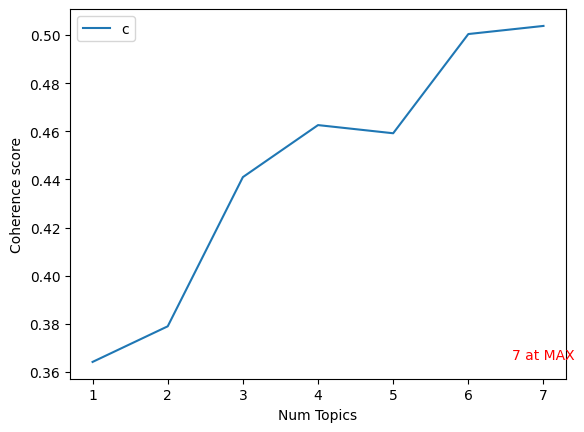

In [23]:
limit = 8
NUM_TOPICS = find_optimal_number_of_topics(dictionary, corpus, processed_data, limit)

In [24]:
# LDA모델 생성
lda_model = LatentDirichletAllocation(n_components=6, learning_method='online', random_state=42, max_iter=1)
lda_top = lda_model.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
# 단어 집합. 1,000개의 단어가 저장됨.
terms = vectorizer.get_feature_names_out()

def get_topics(components, feature_names, n=20):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
topics6_mecab_noun=get_topics(lda_model.components_,terms)

Topic 1: [('중국', 11968.7), ('코로나', 10594.73), ('미국', 10553.07), ('현지', 9925.15), ('시간', 9556.49), ('러시아', 8470.75), ('사람', 6962.48), ('미디어', 6730.0), ('여성', 6643.05), ('우크라', 6541.01), ('기자', 6044.56), ('세계', 5542.82), ('올림픽', 5468.1), ('보도', 5294.41), ('일본', 5002.96), ('선수', 4980.27), ('베이징', 4643.75), ('영국', 4394.14), ('상황', 4314.11), ('페이스북', 4283.29)]
Topic 2: [('투자', 19968.62), ('기업', 18480.66), ('스타트업', 13305.01), ('기술', 12448.7), ('사업', 8870.42), ('메타', 8840.44), ('기자', 8538.05), ('대표', 8456.75), ('그룹', 8437.47), ('글로벌', 8366.15), ('금융', 8338.36), ('반도체', 8176.05), ('버스', 8037.34), ('벤처', 7746.3), ('디지털', 7709.29), ('국내', 7459.12), ('플랫', 7408.36), ('시장', 7247.4), ('데이터', 7198.2), ('규모', 7017.21)]
Topic 3: [('교육', 18472.65), ('미디어', 14691.52), ('문화', 14246.06), ('대학', 10832.38), ('아트', 9512.29), ('교수', 8943.75), ('개최', 8893.46), ('예술', 8877.86), ('부산', 8104.76), ('전시', 8090.08), ('진행', 7847.35), ('한국', 7752.69), ('대학교', 7703.28), ('작품', 7692.45), ('콘텐츠', 7411.18), ('프로그램', 7236.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
def get_topics2(components, terms):
    topics = []
    for topic_idx, topic in enumerate(components):
        topic_terms = [(terms[i], topic[i]) for i in topic.argsort()[:-20 - 1:-1]]
        topics.append((topic_idx, topic_terms))
    return topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
topics = get_topics2(lda_model.components_, terms)
if topics is not None:
    df = pd.DataFrame(topics, columns=['Topic', 'Terms'])
else:
    df = pd.DataFrame()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
# print(type(topics))

<class 'list'>


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  [('중국', 11968.700538111409),
   ('코로나', 10594.73406142946),
   ('미국', 10553.074550281606),
   ('현지', 9925.15207809386),
   ('시간', 9556.491341197256),
   ('러시아', 8470.74641259585),
   ('사람', 6962.476441352155),
   ('미디어', 6729.998132565182),
   ('여성', 6643.053635656544),
   ('우크라', 6541.014830259468),
   ('기자', 6044.563570738856),
   ('세계', 5542.82356192524),
   ('올림픽', 5468.09741064986),
   ('보도', 5294.412497362127),
   ('일본', 5002.958740899633),
   ('선수', 4980.266110343156),
   ('베이징', 4643.749420006195),
   ('영국', 4394.138282693383),
   ('상황', 4314.107771847276),
   ('페이스북', 4283.290287009014)]),
 (1,
  [('투자', 19968.622973546517),
   ('기업', 18480.664381174614),
   ('스타트업', 13305.010379832003),
   ('기술', 12448.697079442385),
   ('사업', 8870.4182261299),
   ('메타', 8840.438909385812),
   ('기자', 8538.0496986266),
   ('대표', 8456.752708687769),
   ('그룹', 8437.469956478753),
   ('글로벌', 8366.154501305002),
   ('금융', 8338.356440414715),
   ('반도체', 8176.046479245),
   ('버스', 8037.339404

In [53]:
# 首先，我们把 topics 转换成更容易处理的形式
topics_transformed = [(topic[0], word, value) for topic in topics for word, value in topic[1]]

# 然后我们把转换后的列表变成 DataFrame
df = pd.DataFrame(topics_transformed, columns=['Topic', 'Word', 'Value'])

# 最后，我们可以把 DataFrame 保存为 CSV 或 Excel 文件
df.to_csv('/content/drive/MyDrive/졸업논문/AI Media/topics6_mecab_noun.csv',index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
